# 19BDS0035
# PRAGYA MISHRA
# HEART ATTACK PREDICTION

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import tree

## Importing data

In [2]:
dataset=pd.read_csv('heart_data.csv')
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploring data

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
dataset.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Checking for null values

In [5]:
dataset.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

## Feature selection

In [6]:
dataset['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [7]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [8]:
X.shape

(303, 13)

In [9]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

## Splitting data into train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## Scaling data by Standardizing

In [11]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(np.array(X_train))
X_train=ss.transform(np.array(X_train))
X_test=ss.transform(np.array(X_test))

In [12]:
X_test.shape

(61, 13)

In [13]:
y_test.shape

(61,)

In [14]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

## Building models 
### Logistic Regression
### Decision Tree :  Gini , Entropy
### Multilayer Perceptron 
### Support Vector Machine (kernel = linear/rbf/poly)
###  Random Forest 
###  AdaBoost

In [15]:
LGR=LogisticRegression(random_state=0, solver='liblinear').fit(X_train,y_train.ravel())
DTCGINI=DecisionTreeClassifier(max_depth=3,criterion='gini',random_state=0).fit(X_train,y_train.ravel())
DTCID3=DecisionTreeClassifier(max_depth=3,criterion='entropy',random_state=0).fit(X_train,y_train.ravel())
NN=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=0).fit(X_train,y_train.ravel())
SVM=SVC(gamma='auto',kernel='rbf').fit(X_train,y_train.ravel())
RFC=RandomForestClassifier(max_depth=3,random_state=0).fit(X_train,y_train.ravel())
ADC=AdaBoostClassifier(n_estimators=30,random_state=0).fit(X_train,y_train.ravel())

In [16]:
print("Classes : ",LGR.classes_)
print("Intercept : ",LGR.intercept_)
print("Coefficient : ",LGR.coef_)

Classes :  [0 1]
Intercept :  [0.13275705]
Coefficient :  [[-0.17665041 -0.73917548  0.76436311 -0.36448002 -0.32424041  0.21036768
   0.21588766  0.33486184 -0.31955887 -0.82756821  0.35381473 -0.80427262
  -0.60722476]]


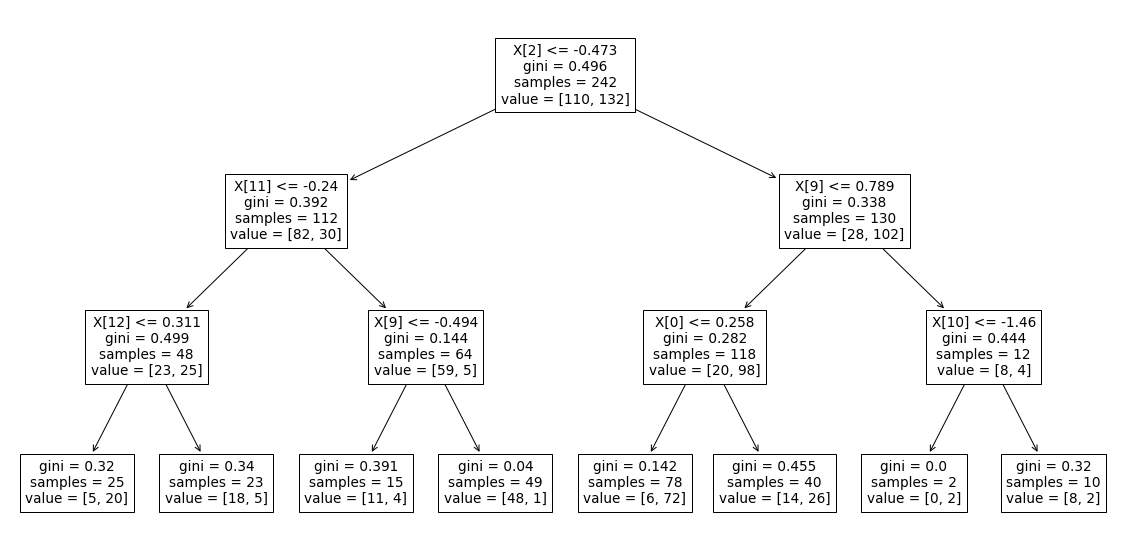

In [17]:
plt.figure(figsize=(20,10))
tree.plot_tree(DTCGINI);

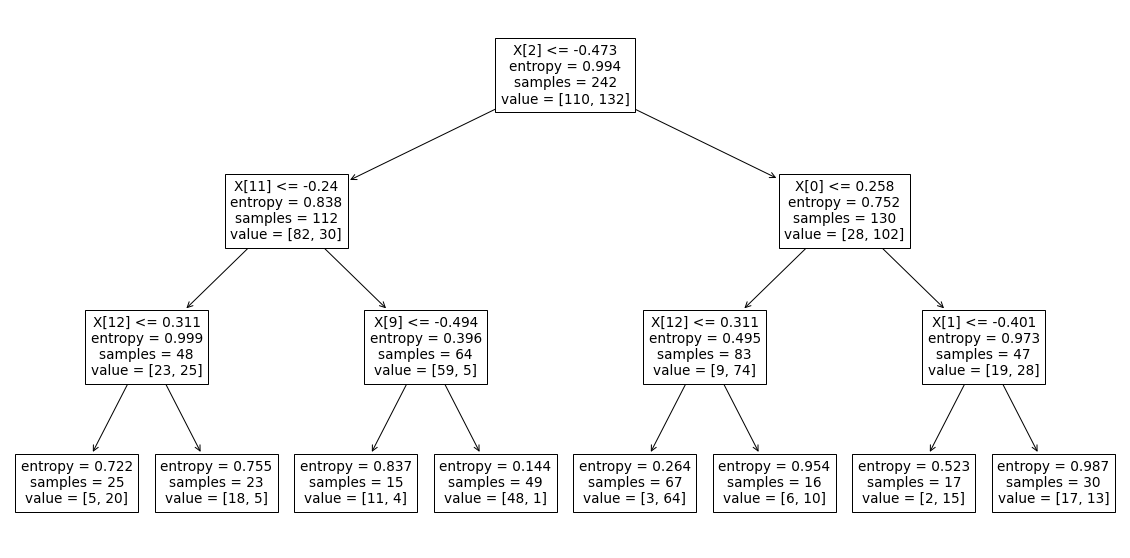

In [18]:
plt.figure(figsize=(20,10))
tree.plot_tree(DTCID3);

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
y_pred_lgr=LGR.predict(X_test)
y_pred_gini=DTCGINI.predict(X_test)
y_pred_id3=DTCID3.predict(X_test)
y_pred_nn=NN.predict(X_test)
y_pred_svm=SVM.predict(X_test)
y_pred_rfc=RFC.predict(X_test)
y_pred_adc=ADC.predict(X_test)

In [20]:
print("Accuracy Logistic Regression : ",accuracy_score(y_test,y_pred_lgr))
print("Accuracy Decision Tree with Gini index : ",accuracy_score(y_test,y_pred_gini))
print("Accuracy Decision Tree with ID3 : ",accuracy_score(y_test,y_pred_id3))
print("Accuracy Neural Network  : ",accuracy_score(y_test,y_pred_nn))
print("Accuracy Support Vector Machine  : ",accuracy_score(y_test,y_pred_svm))
print("Accuracy Random Forest : ",accuracy_score(y_test,y_pred_rfc))
print("Accuracy AdaBoost  : ",accuracy_score(y_test,y_pred_adc))

Accuracy Logistic Regression :  0.8360655737704918
Accuracy Decision Tree with Gini index :  0.8688524590163934
Accuracy Decision Tree with ID3 :  0.8360655737704918
Accuracy Neural Network  :  0.8360655737704918
Accuracy Support Vector Machine  :  0.819672131147541
Accuracy Random Forest :  0.8688524590163934
Accuracy AdaBoost  :  0.8688524590163934


In [21]:
print("Confusion matrix Logistic Regression : \n",confusion_matrix(y_test,y_pred_lgr))
print("Confusion matrix Decision Tree with Gini index : \n",confusion_matrix(y_test,y_pred_gini))
print("Confusion matrix Decision Tree with ID3 : \n",confusion_matrix(y_test,y_pred_id3))
print("Confusion matrix Neural Network : \n",confusion_matrix(y_test,y_pred_nn))
print("Confusion matrix Support Vector Machine : \n",confusion_matrix(y_test,y_pred_svm))
print("Confusion matrix Random Forest : \n",confusion_matrix(y_test,y_pred_rfc))
print("Confusion matrix AdaBoost : \n",confusion_matrix(y_test,y_pred_adc))

Confusion matrix Logistic Regression : 
 [[22  6]
 [ 4 29]]
Confusion matrix Decision Tree with Gini index : 
 [[20  8]
 [ 0 33]]
Confusion matrix Decision Tree with ID3 : 
 [[22  6]
 [ 4 29]]
Confusion matrix Neural Network : 
 [[21  7]
 [ 3 30]]
Confusion matrix Support Vector Machine : 
 [[21  7]
 [ 4 29]]
Confusion matrix Random Forest : 
 [[23  5]
 [ 3 30]]
Confusion matrix AdaBoost : 
 [[25  3]
 [ 5 28]]


<AxesSubplot:>

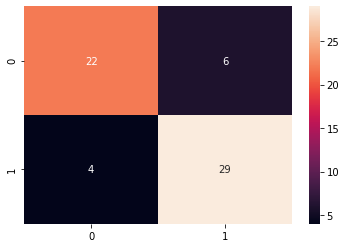

In [22]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_pred_lgr),annot=True)

<AxesSubplot:>

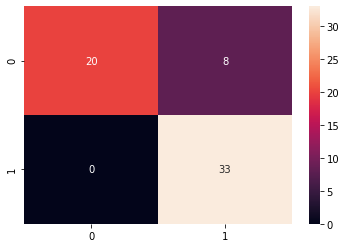

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred_gini),annot=True)

<AxesSubplot:>

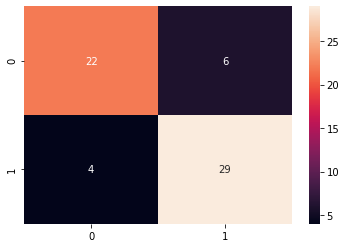

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred_id3),annot=True)

<AxesSubplot:>

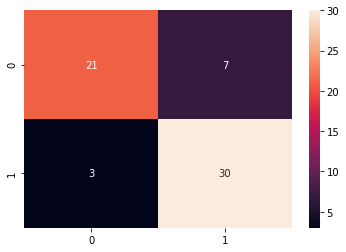

In [25]:
sns.heatmap(confusion_matrix(y_test,y_pred_nn),annot=True)

<AxesSubplot:>

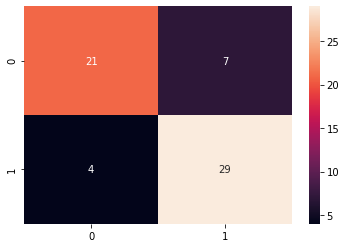

In [26]:
sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True)

<AxesSubplot:>

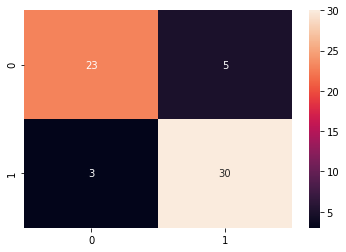

In [27]:
sns.heatmap(confusion_matrix(y_test,y_pred_rfc),annot=True)

<AxesSubplot:>

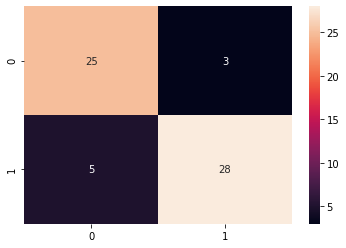

In [28]:
sns.heatmap(confusion_matrix(y_test,y_pred_adc),annot=True)

### Comparing the accuracies ADABOOST gives the best accuracy
Accuracy Logistic Regression :  0.819672131147541

Accuracy Decision Tree with Gini index :  0.7868852459016393

Accuracy Decision Tree with ID3 :  0.7868852459016393

Accuracy Neural Network  :  0.8032786885245902

Accuracy Support Vector Machine  :  0.8032786885245902

Accuracy Random Forest :  0.819672131147541

Accuracy AdaBoost  :  0.8524590163934426


## Hence, we choose Adaboosting as the final model

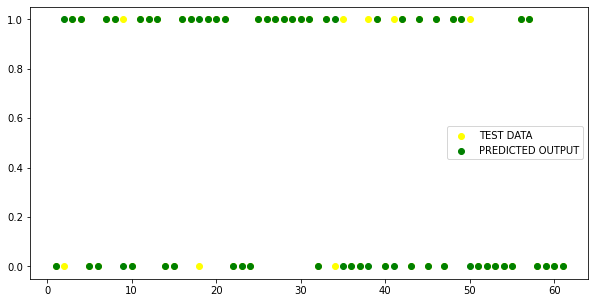

In [29]:
plt.figure(figsize=(10,5))
plt.scatter(range(1,y_test.size+1),y_test,c='yellow',label='TEST DATA')
plt.scatter(range(1,y_test.size+1),y_pred_adc,c='green',label='PREDICTED OUTPUT')
plt.legend()
plt.show()